In [3]:
import pandas as pd 
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
df=pd.read_csv("Concrete_Data_Yeh.csv")

In [5]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [6]:
#Check column types and describe which columns are numerical, or categorical
df.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

In [7]:
#Check dataset size
df.shape

(1030, 9)

# Data preprocessing

In [8]:
#Find and treat missing values (If any)
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [9]:
b_0 = df[df['slag']==0].shape[0]/df.shape[0]*100
print(b_0,'%')

45.728155339805824 %


In [10]:
b_0 = df[df['flyash']==0].shape[0]/df.shape[0]*100
print(b_0,'%')

54.95145631067962 %


In [11]:
b_0 = df[df['superplasticizer']==0].shape[0]/df.shape[0]*100
print(b_0,'%')

36.79611650485437 %


In [12]:
df = df.replace(0, np.NaN)
df.mean()

cement              281.167864
slag                136.158676
flyash              120.288793
water               181.567282
superplasticizer      9.816897
coarseaggregate     972.918932
fineaggregate       773.580485
age                  45.662136
csMPa                35.817961
dtype: float64

In [13]:
df.isnull().sum()

cement                0
slag                471
flyash              566
water                 0
superplasticizer    379
coarseaggregate       0
fineaggregate         0
age                   0
csMPa                 0
dtype: int64

In [14]:
mediann=df['superplasticizer'].median()
df['superplasticizer'].fillna(value=mediann,inplace=True)

In [15]:
mediann=df['slag'].median()
df['slag'].fillna(value=mediann,inplace=True)

In [16]:
mediann=df['flyash'].median()
df['flyash'].fillna(value=mediann,inplace=True)

In [17]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [18]:
#Perform Univariate analysis
#Calculate mean, median, std dev, and quartiles of numerical data
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,135.948932,120.899417,181.567282,9.663495,972.918932,773.580485,45.662136,35.817961
std,104.506364,53.279837,22.595744,21.354219,3.645923,77.753954,80.175980,63.169912,16.705742
min,102.000000,11.000000,24.500000,121.800000,1.700000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,129.800000,121.400000,164.900000,8.200000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,135.700000,121.400000,185.000000,9.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,121.400000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [19]:
df.median()

cement              272.900
slag                135.700
flyash              121.400
water               185.000
superplasticizer      9.400
coarseaggregate     968.000
fineaggregate       779.500
age                  28.000
csMPa                34.445
dtype: float64

array([[<AxesSubplot:title={'center':'cement'}>,
        <AxesSubplot:title={'center':'slag'}>,
        <AxesSubplot:title={'center':'water'}>],
       [<AxesSubplot:title={'center':'superplasticizer'}>,
        <AxesSubplot:title={'center':'coarseaggregate'}>,
        <AxesSubplot:title={'center':'fineaggregate'}>],
       [<AxesSubplot:title={'center':'csMPa'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

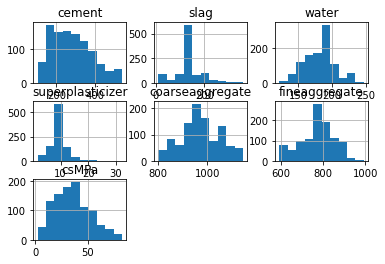

In [20]:
#Check the distribution of numerical variables and comment on it
columns = ['cement', 'slag', 'water', 'superplasticizer','coarseaggregate','fineaggregate','csMPa']
df[columns].hist()

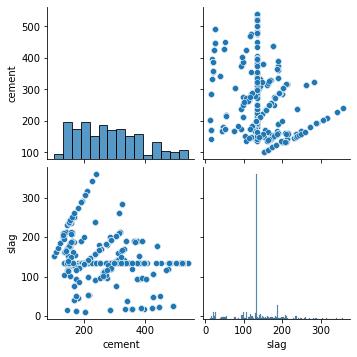

In [21]:
#Perform Bivariate analysis
#Plot pair plots
sb.pairplot(df[['cement','slag']])

<AxesSubplot:xlabel='cement', ylabel='slag'>

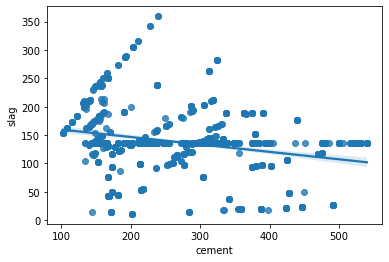

In [22]:
sb.regplot(x="cement", y="slag", data=df)

In [23]:
#Perform Chi-square analysis to check whether there is a relationship between
#age and csMPa
# create contingency table
data_crosstab = pd.crosstab(df['age'],
                            df['csMPa'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = df['age'].unique()
columns = df['csMPa'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 11462.206895002948  and p value is: 0.0005460933550068825
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 11462.206895002948  and critical value is: 11216.79223246852
Null Hypothesis is rejected.


<AxesSubplot:>

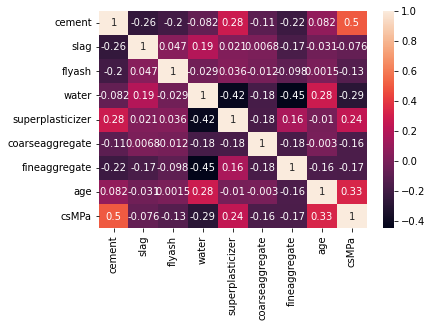

In [24]:
#Calculate correlation, and plot their heatmap
sb.heatmap(df.corr(),annot=True)

# outlier analysis 

In [211]:
col=['cement','slag','flyash','superplasticizer','coarseaggregate']

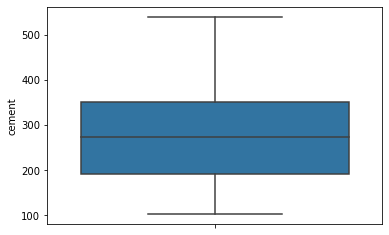

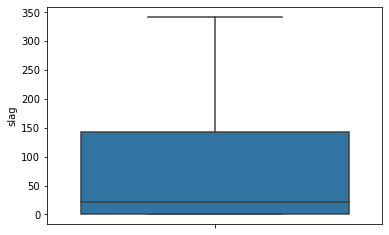

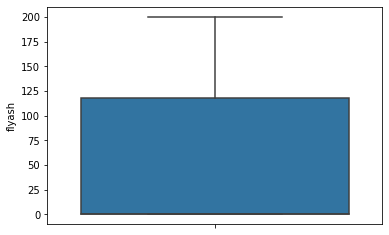

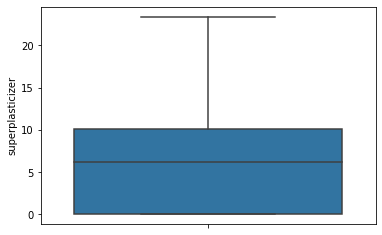

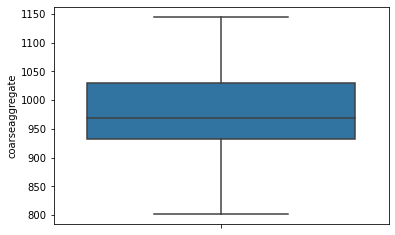

In [212]:
for c in col:
    percentile25=df[c].quantile(0.25)
    percentile75=df[c].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+(1.5*iqr)
    lower_limit=percentile25-(1.5*iqr)
    df=df[df[c]<upper_limit]
    df=df[df[c]>lower_limit]
    plt.figure()
    sb.boxplot(y=c,data=df)

In [25]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

# Linear regression

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [27]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)


LinearRegression()

In [29]:
reg.coef_

array([  5.5341097 ,   1.67275898,  -2.06253727, -11.99380667,
        -2.42747015,  -6.19624235,  -6.56763214,   6.96715059])

In [30]:
reg.intercept_

35.95850728155361

In [31]:
Y_pred=reg.predict(X_test)


In [32]:
from sklearn import metrics
metrics.mean_squared_error(Y_test,Y_pred)

142.00411435591468

In [33]:
import numpy as np
np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

11.91654792110176

In [34]:
metrics.r2_score(Y_test,Y_pred)

0.5306732357817683

# Decision tree

In [35]:
X=df.drop(['csMPa'],axis=1).values
Y=df['csMPa'].values

In [39]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
Y_transformed= lab.fit_transform(Y)

#view transformed values
print(Y_transformed)

[841 781 537 ... 219 386 380]


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [43]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [44]:
Y_pred=dtc.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.04854368932038835

In [47]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         0
          38       0.00    

C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall 

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.04854368932038835

In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         0
          38       0.00    

C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall 

# svm

In [50]:
from sklearn.svm import SVR

In [51]:
regressor=SVR(kernel='linear',degree=1)

In [52]:
import matplotlib.pyplot as plt

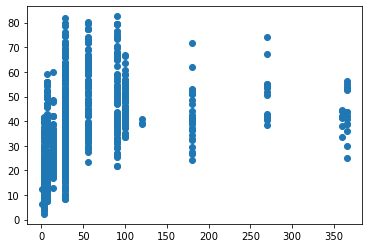

In [53]:
plt.scatter(df['age'],df['csMPa'])

In [54]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,135.7,121.4,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,135.7,121.4,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,121.4,228.0,9.4,932.0,594.0,270,40.27
3,332.5,142.5,121.4,228.0,9.4,932.0,594.0,365,41.05
4,198.6,132.4,121.4,192.0,9.4,978.4,825.5,360,44.30


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=42)

In [56]:
regressor.fit(X_train,Y_train)

SVR(degree=1, kernel='linear')

In [57]:
pred=regressor.predict(X_test)

In [58]:
print(regressor.score(X_test,Y_test))

0.5300110174341908


In [59]:
from sklearn.metrics import r2_score

In [60]:
print(r2_score(Y_test,pred))

0.5300110174341908


In [61]:
regressor=SVR(kernel='rbf',epsilon=1.0)
regressor.fit(X_train,Y_train)
pred=regressor.predict(X_test)
print(regressor.score(X_test,Y_test))
print(r2_score(Y_test,pred))

0.027116754420378864
0.027116754420378864


# polynomial regression degree 2

In [79]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
#include bias parameter
lr = LinearRegression()
lr.fit(X_train_trans, Y_train)
Y_pred = lr.predict(X_test_trans)
print(r2_score(Y_test, Y_pred))

0.7465025801549512


# polynomial regression degree 3

In [80]:
#applying polynomial regression degree 3
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
#include bias parameter
lr = LinearRegression()
lr.fit(X_train_trans, Y_train)
Y_pred = lr.predict(X_test_trans)
print(r2_score(Y_test, Y_pred))

0.8139100231086578
